In [ ]:
!pip install google-play-scraper
!pip install transformers
!pip install Pillow==9.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


IMPORT LIBRARIES

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.netflix.mediaclient',
    lang='id',
    country='id',
    count=1000, 
    filter_score_with=None,
    sort=Sort.NEWEST)

CONVERT to PANDAS DF

In [ ]:
df = pd.DataFrame(np.array(result), columns=['review'])

df = df.join(pd.DataFrame(df.pop('review').tolist()))

In [ ]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,69314263-01ab-4806-9f14-9ce7522ccf32,richo siahaan,https://play-lh.googleusercontent.com/a-/ACNPE...,"apk bgsat,masa harus berbayar Maksa amat anj",1,0,8.1.0 build 9 40014,2022-11-05 06:31:51,None,None
1,1dc85166-61c1-4f9b-8030-0cf2eab27975,Leni Marlina,https://play-lh.googleusercontent.com/a/ALm5wu...,Naha harese d buka brow,4,0,8.47.0 build 13 50303,2022-11-05 06:26:54,None,None
2,feda8da4-8cf4-48cd-a465-31e410e7f496,windy kris monika,https://play-lh.googleusercontent.com/a-/ACNPE...,Ga guna,1,0,8.47.0 build 13 50303,2022-11-05 05:24:02,None,None
3,43577012-7d9e-43a2-98f6-9b531d81cc61,vindy thirza,https://play-lh.googleusercontent.com/a-/ACNPE...,Bagus,5,0,8.47.0 build 13 50303,2022-11-05 05:09:38,None,None
4,697e6746-b4d1-408b-9fb5-de207558b8bc,I Wayan Oka Mahendra Yasa19,https://play-lh.googleusercontent.com/a/ALm5wu...,👍👍,5,0,None,2022-11-05 03:24:49,None,None
...,...,...,...,...,...,...,...,...,...,...
995,8e2f2751-ddf1-4763-945d-ab8ffab27b71,keyla._.official,https://play-lh.googleusercontent.com/a-/ACNPE...,HEH LO MAU UPLOAD VIDIO PERHATIIN DLU BISA GAK...,1,0,None,2022-09-21 09:00:52,None,None
996,f016f63d-a275-4965-bc61-20fc424049ef,Sulaiman Abdul Karim,https://play-lh.googleusercontent.com/a-/ACNPE...,Too much gay,2,0,None,2022-09-21 08:29:20,None,None
997,129a311c-d36d-4b4b-9fba-a2582439a536,Aqiluzzafir Arwany,https://play-lh.googleusercontent.com/a-/ACNPE...,Apk buruk,1,0,None,2022-09-21 06:37:35,None,None
998,bdddaf98-d84d-4003-9665-04c0027a5b32,jin nisme,https://play-lh.googleusercontent.com/a/ALm5wu...,Kenapa ketika saya buka film error mulu? Apaka...,3,0,8.40.0 build 4 50271,2022-09-21 05:58:01,None,None


In [ ]:
len(df)

1000

In [ ]:
data = []

for i in df["content"]:
  data.append(i)

Sentiment Analysis

In [ ]:
import nltk 
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("indonesian"))
len(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


757

In [ ]:
data_stopwords = "https://raw.githubusercontent.com/Braincore-id/IndoTWEES/main/stopwords_twitter.csv"
df_stopwords = pd.read_csv(data_stopwords, names=["stopword"])

In [ ]:
new_stopwords = []

for word in df_stopwords['stopword']:
  new_stopwords.append(word)

In [ ]:
stop_words.update(new_stopwords)
len(stop_words)

980

In [ ]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'^RT[\s]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'html.parser')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [ ]:
url_kamus_alay = 'https://raw.githubusercontent.com/algonacci/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv'
alay_dict = pd.read_csv(url_kamus_alay, names = ['original', 'replacement'], encoding='latin-1')
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

In [ ]:
removed_slangwords = normalize_alay(str(data))

In [ ]:
cleaned_data = tweet_cleaner(str(removed_slangwords))

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

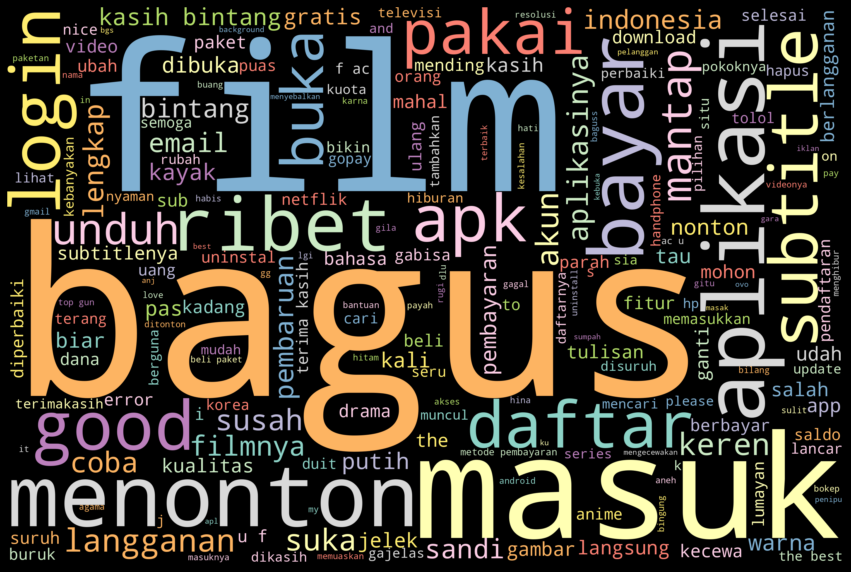

In [ ]:
from wordcloud import WordCloud
from PIL import Image


text = str(cleaned_data).replace("'","")

wordcloud = WordCloud(width=3000, height=2000,
                      max_words=200, colormap='Set3',
                      background_color="black",
                      stopwords=stop_words).generate(text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df['sentiment'] = ''
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sentiment
0,69314263-01ab-4806-9f14-9ce7522ccf32,richo siahaan,https://play-lh.googleusercontent.com/a-/ACNPE...,"apk bgsat,masa harus berbayar Maksa amat anj",1,0,8.1.0 build 9 40014,2022-11-05 06:31:51,None,None,
1,1dc85166-61c1-4f9b-8030-0cf2eab27975,Leni Marlina,https://play-lh.googleusercontent.com/a/ALm5wu...,Naha harese d buka brow,4,0,8.47.0 build 13 50303,2022-11-05 06:26:54,None,None,
2,feda8da4-8cf4-48cd-a465-31e410e7f496,windy kris monika,https://play-lh.googleusercontent.com/a-/ACNPE...,Ga guna,1,0,8.47.0 build 13 50303,2022-11-05 05:24:02,None,None,
3,43577012-7d9e-43a2-98f6-9b531d81cc61,vindy thirza,https://play-lh.googleusercontent.com/a-/ACNPE...,Bagus,5,0,8.47.0 build 13 50303,2022-11-05 05:09:38,None,None,
4,697e6746-b4d1-408b-9fb5-de207558b8bc,I Wayan Oka Mahendra Yasa19,https://play-lh.googleusercontent.com/a/ALm5wu...,👍👍,5,0,None,2022-11-05 03:24:49,None,None,
...,...,...,...,...,...,...,...,...,...,...,...
995,8e2f2751-ddf1-4763-945d-ab8ffab27b71,keyla._.official,https://play-lh.googleusercontent.com/a-/ACNPE...,HEH LO MAU UPLOAD VIDIO PERHATIIN DLU BISA GAK...,1,0,None,2022-09-21 09:00:52,None,None,
996,f016f63d-a275-4965-bc61-20fc424049ef,Sulaiman Abdul Karim,https://play-lh.googleusercontent.com/a-/ACNPE...,Too much gay,2,0,None,2022-09-21 08:29:20,None,None,
997,129a311c-d36d-4b4b-9fba-a2582439a536,Aqiluzzafir Arwany,https://play-lh.googleusercontent.com/a-/ACNPE...,Apk buruk,1,0,None,2022-09-21 06:37:35,None,None,
998,bdddaf98-d84d-4003-9665-04c0027a5b32,jin nisme,https://play-lh.googleusercontent.com/a/ALm5wu...,Kenapa ketika saya buka film error mulu? Apaka...,3,0,8.40.0 build 4 50271,2022-09-21 05:58:01,None,None,


In [ ]:
from transformers import pipeline

pretrained_name = "w11wo/indonesian-roberta-base-indolem-sentiment-classifier-fold-0"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

In [ ]:
sentiment = []

for i in data:
  sentiment.append(nlp(i))

In [ ]:
predicted_label = []
confidence = []

for myList in sentiment:
  for item in myList: 
    predicted_label.append(item['label'])
    confidence.append(item["score"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment'] = le.fit_transform(predicted_label)

In [ ]:
df[['content', 'sentiment']]

,content,sentiment
0,"apk bgsat,masa harus berbayar Maksa amat anj",0
1,Naha harese d buka brow,0
2,Ga guna,0
3,Bagus,1
4,👍👍,1
...,...,...
995,HEH LO MAU UPLOAD VIDIO PERHATIIN DLU BISA GAK...,0
996,Too much gay,1
997,Apk buruk,0
998,Kenapa ketika saya buka film error mulu? Apaka...,0


In [ ]:
def getAnalysis(score):
  if score == 0:
    return 'Negative'
  else:
    return "Positive"

In [ ]:
df["label"] = df["sentiment"].apply(getAnalysis)

In [ ]:
unrelated = ['reviewId', "userName" , "userImage" , "score" ,'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']
df.drop(unrelated, inplace=True, axis=1)

In [ ]:
df

,content,sentiment,label
0,"apk bgsat,masa harus berbayar Maksa amat anj",0,Negative
1,Naha harese d buka brow,0,Negative
2,Ga guna,0,Negative
3,Bagus,1,Positive
4,👍👍,1,Positive
...,...,...,...
995,HEH LO MAU UPLOAD VIDIO PERHATIIN DLU BISA GAK...,0,Negative
996,Too much gay,1,Positive
997,Apk buruk,0,Negative
998,Kenapa ketika saya buka film error mulu? Apaka...,0,Negative


In [ ]:
df.rename(columns={'sentiment':'label', 'label':'Sentiment'}, inplace=True)

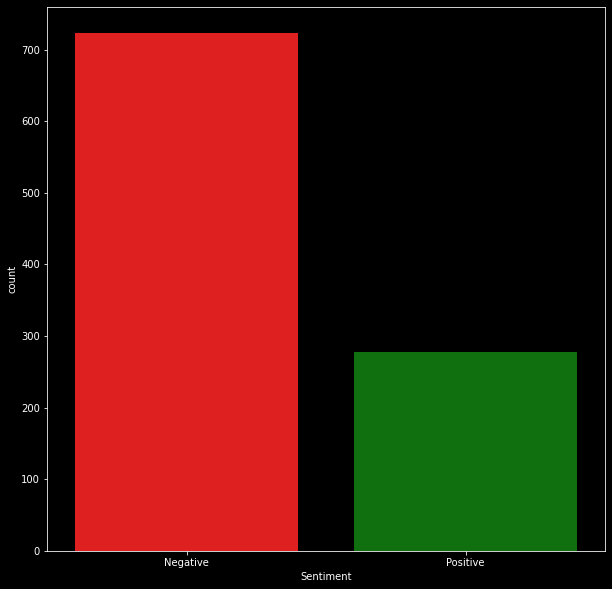

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(x=df["Sentiment"],data=df)
sns.countplot(x=df["Sentiment"],data=df , palette=['Red',"Green"] )
plt.savefig('sentiment.png')

Word Embedding

In [ ]:
from nltk import word_tokenize
import tqdm
nltk.download('punkt')
from gensim.models import Word2Vec

sentences = [word_tokenize(comment) for comment in tqdm.tqdm(df['content'])]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 1000/1000 [00:00<00:00, 7576.33it/s]


In [ ]:
sentences[:5]

[['apk', 'bgsat', ',', 'masa', 'harus', 'berbayar', 'Maksa', 'amat', 'anj'],
 ['Naha', 'harese', 'd', 'buka', 'brow'],
 ['Ga', 'guna'],
 ['Bagus'],
 ['👍👍']]

In [ ]:
model = Word2Vec(sentences=sentences,
                 size=512,
                 window=20, 
                 min_count=2, 
                 workers=10,
                 iter=1000)

In [ ]:
model.vector_size

512

In [ ]:
model.similar_by_word("menyusahkan", topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('menyebalkan', 0.6484605073928833),
 ('bisa2', 0.4519999027252197),
 ('wifi', 0.40365472435951233),
 ('Teman', 0.39056649804115295),
 ('penipu', 0.3804282546043396),
 ('parah', 0.37698084115982056),
 ('minta', 0.36555540561676025),
 ('Memuaskan', 0.3654891550540924),
 ('Tolol', 0.3545214533805847),
 ('perpanjangan', 0.35068804025650024)]

In [ ]:
words = list(model.wv.vocab)
print(words)

['apk', 'bgsat', ',', 'masa', 'harus', 'berbayar', 'amat', 'anj', 'd', 'buka', 'Ga', 'guna', 'Bagus', '👍👍', 'di', 'update', 'lagi', 'Mohon', 'maaf', 'subtitle', 'nya', 'mohon', 'perbaiki', 'dan', 'suka', 'keluar', 'aplikasi', 'dengan', '.', 'Terimakasih', 'Aplikasinya', 'bagus', 'tapi', 'tidak', 'bisa', 'ke', 'semua', 'karena', 'pembayaran', 'pakai', 'credit', 'card', 'atau', 'dompet', 'lain', 'biasa', 'google', 'pay', 'pulsa', 'coba', 'untuk', 'pendaftaran', 'paketnya', 'film', 'yang', 'tiba', 'ngga', 'tengah', 'nonton', 'Gajelas', 'mau', 'daftar', 'gabisa', 'Tidak', 'masuk', 'akun', 'Netflix', 'padahal', 'saldo', 'saya', 'sudah', 'terpotong', 'Sangat', 'ini', 'gak', 'sekarang', '...', 'Kenapa', 'yaa', '?', 'Aplikasi', 'penipu', 'udah', 'buat', 'uang', 'ga', 'login', 'sampe', 'skrng', 'Dateng', 'download', 'ulang', 'putih', 'ternyata', 'bukan', 'error', 'ya', 'masalah', 'udh', 'lama', 'ada', 'sama', 'sekali', 'paling', 'pas', 'netflix', 'tanpa', 'Bgs', 'Ok', 'hiburan', 'Tolong', 'ruba

In [ ]:
X = model[model.wv.vocab]

df_gensim = pd.DataFrame(X)
df_gensim.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,1.303010,-0.524969,0.384556,-1.055018,-0.003037,0.900208,-0.039560,0.667496,-0.363104,-0.163860,...,1.591801,-0.798092,0.142646,0.251632,-1.696016,0.833131,-1.250565,-0.001316,0.892782,-0.307104
1,-0.105398,-0.402609,-0.065167,0.359386,-0.221710,0.223506,-0.223755,-0.008473,-0.096459,0.240138,...,0.198588,0.446898,-0.154610,-0.379782,-0.084246,0.081585,-0.413416,0.124724,-0.430229,-0.724175
2,0.822850,0.198497,0.224933,0.006835,-0.012893,0.805050,0.103550,-0.488053,-0.252962,-1.069785,...,-0.794457,-0.259534,0.523703,0.053294,0.541123,0.140094,-0.383073,-0.424655,0.640915,-0.853791
3,-0.407434,1.194238,-0.520669,0.773389,-1.200581,-0.799639,-0.945318,-0.205401,0.494094,0.941612,...,-0.535761,-1.101390,0.420947,-0.455420,1.500874,-1.062519,-0.458440,-1.369764,-0.138045,-0.457467
4,-0.404525,0.443571,1.562722,-0.054134,2.473303,0.209088,-0.117868,1.698423,-1.040803,0.129759,...,-0.398440,-1.022723,-1.018120,0.524360,-0.951595,-0.551023,-0.358408,-0.204328,-1.173202,-1.450394


In [ ]:
X_corr = df_gensim.corr()
values,vectors=np.linalg.eig(X_corr)

args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

new_vectors = vectors[:,:2]

neww_X = np.dot(X,new_vectors)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128078 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128078 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_

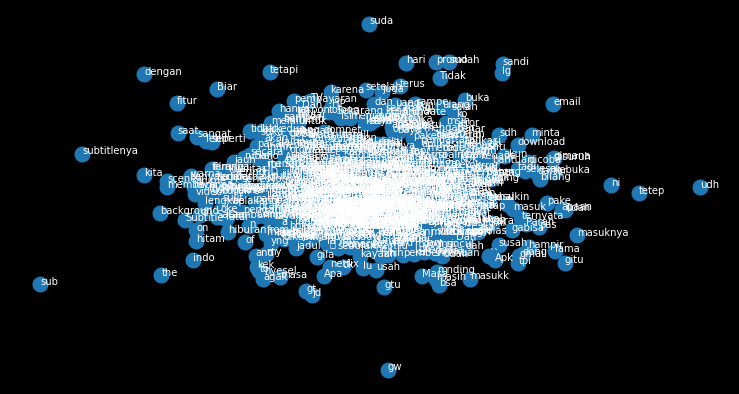

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10)
plt.axis('off')
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))
plt.savefig('gensim.png')

Gensim model

In [ ]:
import os
import nltk
nltk.download('punkt')

from tqdm.auto import tqdm
from nltk import word_tokenize
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
temp = []
for i in df["content"]:
    temp.append(i)

3D Word Embedding

In [ ]:
result = []
for j in temp:
    result.append(cleaned_data(j))

TypeError: ignored

In [ ]:
from keras.layers import Embedding

In [ ]:
all_texts = df_gensim['tweet_cleaner'].to_numpy()
all_texts

KeyError: ignored

In [ ]:
cleaned_data

'apk bgsat masa harus berbayar maksa amat anj naha harese di buka brow ga guna bagus bagus film nya di pembaruan lagi kaka mohon maaf subtitle nya mohon di perbaiki dan kadang suka keluar aplikasi dengan sendirinya terimakasih aplikasinya bagus tapi tidak bisa di jangkau ke semua kalanga karena pembayaran harus pakai credit card atau dompet elektrik saya di aplikasi lain biasa pembelian pakai google pay dan pulsa coba di permudah untuk pendaftaran paketnya ada film yang tiba tiba tidak bisa di putar di tengah tengah nonton gajelas mau daftar gabisa tidak bisa masuk ke akun netflix nya padahal saldo saya sudah terpotong sangat bagus aplikasi ini netflix tidak bisa masuk sekarang kenapa yaa aplikasi penipu saya sudah buat akun uang sudah kesedot tapi tidak bisa login sudah berkali kali konfirmasi sampai sekarang uang saya tidak dikembakikan dateng kesini niatnya mau unduh ulang karena subtitle putih semua ternyata bukan karena error ya masalah ini sudah lama tapi tidak ada pergerakan sam

In [ ]:
df

,content,label,Sentiment
0,"apk bgsat,masa harus berbayar Maksa amat anj",0,Negative
1,Naha harese d buka brow,0,Negative
2,Ga guna,0,Negative
3,Bagus,1,Positive
4,👍👍,1,Positive
...,...,...,...
995,HEH LO MAU UPLOAD VIDIO PERHATIIN DLU BISA GAK...,0,Negative
996,Too much gay,1,Positive
997,Apk buruk,0,Negative
998,Kenapa ketika saya buka film error mulu? Apaka...,0,Negative
